In [2]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [5]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm

base_url = 'https://api.pullpush.io/reddit/search/submission/'

def fetch_submissions(query, start_date, end_date, size=100):
    submissions = []
    current_start = start_date
    total_days = (end_date - start_date).days

    with tqdm(total=total_days, desc='Fetching submissions') as pbar:
        while current_start < end_date:
            after = int(current_start.timestamp())
            before = int((current_start + timedelta(days=1)).timestamp())

            url = f"{base_url}?q={query}&after={after}&before={before}&size={size}"

            try:
                response = requests.get(url)
                response.raise_for_status()
                data = response.json()

                for submission in data['data']:
                    submission_date = datetime.utcfromtimestamp(submission['created_utc'])
                    submissions.append({
                        'title': submission['title'],
                        'selftext': submission['selftext'],
                        'date': submission_date
                    })

            except Exception as e:
                print(f"An error occurred: {e}")

            current_start += timedelta(days=1)
            pbar.update(1)

    return submissions

start_date = datetime(2016, 1, 1)
end_date = datetime(2023, 12, 5)

data = fetch_submissions('Google', start_date, end_date)

df = pd.DataFrame(data)

print(f"Number of posts collected: {len(df)}")


Fetching submissions:   0%|          | 0/2895 [00:00<?, ?it/s]C:\Users\Aditya\AppData\Local\Temp\ipykernel_30028\1320383494.py:32: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  submission_date = datetime.utcfromtimestamp(submission['created_utc'])
Fetching submissions:  34%|███▍      | 997/2895 [54:26<5:07:55,  9.73s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1537641000&before=1537727400&size=100


Fetching submissions:  34%|███▍      | 998/2895 [54:47<6:53:17, 13.07s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1537727400&before=1537813800&size=100


Fetching submissions:  35%|███▍      | 999/2895 [55:08<8:07:13, 15.42s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1537813800&before=1537900200&size=100


Fetching submissions:  35%|███▍      | 1000/2895 [55:28<8:56:08, 16.98s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1537900200&before=1537986600&size=100


Fetching submissions:  35%|███▍      | 1001/2895 [55:50<9:39:34, 18.36s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1537986600&before=1538073000&size=100


Fetching submissions:  35%|███▍      | 1002/2895 [56:10<10:00:11, 19.02s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1538073000&before=1538159400&size=100


Fetching submissions:  35%|███▍      | 1003/2895 [56:31<10:14:43, 19.49s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1538159400&before=1538245800&size=100


Fetching submissions:  35%|███▍      | 1004/2895 [56:52<10:24:44, 19.82s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1538245800&before=1538332200&size=100


Fetching submissions:  35%|███▍      | 1005/2895 [57:12<10:30:56, 20.03s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1538332200&before=1538418600&size=100


Fetching submissions:  35%|███▍      | 1006/2895 [57:33<10:36:37, 20.22s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1538418600&before=1538505000&size=100


Fetching submissions:  35%|███▍      | 1007/2895 [57:53<10:39:31, 20.32s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1538505000&before=1538591400&size=100


Fetching submissions:  35%|███▍      | 1008/2895 [58:14<10:41:32, 20.40s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1538591400&before=1538677800&size=100


Fetching submissions:  35%|███▍      | 1009/2895 [58:34<10:42:00, 20.42s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1538677800&before=1538764200&size=100


Fetching submissions:  35%|███▍      | 1010/2895 [58:55<10:43:05, 20.47s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1538764200&before=1538850600&size=100


Fetching submissions:  35%|███▍      | 1011/2895 [59:16<10:43:48, 20.50s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1538850600&before=1538937000&size=100


Fetching submissions:  35%|███▍      | 1012/2895 [59:36<10:44:06, 20.52s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1538937000&before=1539023400&size=100


Fetching submissions:  35%|███▍      | 1013/2895 [59:57<10:44:37, 20.55s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1539023400&before=1539109800&size=100


Fetching submissions:  66%|██████▋   | 1920/2895 [1:45:22<30:58,  1.91s/it]  

An error occurred: 525 Server Error:  for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1617388200&before=1617474600&size=100


Fetching submissions:  70%|██████▉   | 2014/2895 [1:49:57<1:57:25,  8.00s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1625509800&before=1625596200&size=100


Fetching submissions:  70%|██████▉   | 2015/2895 [1:50:18<2:53:08, 11.81s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1625596200&before=1625682600&size=100


Fetching submissions:  70%|██████▉   | 2016/2895 [1:50:38<3:31:32, 14.44s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1625682600&before=1625769000&size=100


Fetching submissions:  70%|██████▉   | 2017/2895 [1:50:59<3:59:55, 16.40s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1625769000&before=1625855400&size=100


Fetching submissions:  70%|██████▉   | 2018/2895 [1:51:20<4:19:04, 17.72s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1625855400&before=1625941800&size=100


Fetching submissions:  70%|██████▉   | 2019/2895 [1:51:41<4:32:27, 18.66s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1625941800&before=1626028200&size=100


Fetching submissions:  70%|██████▉   | 2020/2895 [1:52:02<4:41:38, 19.31s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1626028200&before=1626114600&size=100


Fetching submissions:  70%|██████▉   | 2021/2895 [1:52:23<4:47:51, 19.76s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1626114600&before=1626201000&size=100


Fetching submissions:  70%|██████▉   | 2022/2895 [1:52:44<4:52:32, 20.11s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1626201000&before=1626287400&size=100


Fetching submissions:  70%|██████▉   | 2023/2895 [1:53:04<4:55:29, 20.33s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1626287400&before=1626373800&size=100


Fetching submissions:  70%|██████▉   | 2024/2895 [1:53:25<4:57:44, 20.51s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1626373800&before=1626460200&size=100


Fetching submissions:  70%|██████▉   | 2025/2895 [1:53:46<4:59:23, 20.65s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1626460200&before=1626546600&size=100


Fetching submissions:  70%|██████▉   | 2026/2895 [1:54:07<4:59:54, 20.71s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1626546600&before=1626633000&size=100


Fetching submissions:  70%|███████   | 2027/2895 [1:54:28<5:00:37, 20.78s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1626633000&before=1626719400&size=100


Fetching submissions:  70%|███████   | 2028/2895 [1:54:49<5:00:40, 20.81s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1626719400&before=1626805800&size=100


Fetching submissions:  70%|███████   | 2029/2895 [1:55:10<5:00:39, 20.83s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1626805800&before=1626892200&size=100


Fetching submissions:  70%|███████   | 2030/2895 [1:55:31<5:00:47, 20.86s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1626892200&before=1626978600&size=100


Fetching submissions:  70%|███████   | 2031/2895 [1:55:52<5:00:20, 20.86s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1626978600&before=1627065000&size=100


Fetching submissions:  70%|███████   | 2032/2895 [1:56:13<5:00:16, 20.88s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1627065000&before=1627151400&size=100


Fetching submissions:  70%|███████   | 2033/2895 [1:56:33<4:59:56, 20.88s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1627151400&before=1627237800&size=100


Fetching submissions:  70%|███████   | 2034/2895 [1:56:54<4:59:41, 20.88s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1627237800&before=1627324200&size=100


Fetching submissions:  70%|███████   | 2035/2895 [1:57:15<4:59:28, 20.89s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1627324200&before=1627410600&size=100


Fetching submissions:  70%|███████   | 2036/2895 [1:57:36<4:59:05, 20.89s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1627410600&before=1627497000&size=100


Fetching submissions:  70%|███████   | 2037/2895 [1:57:57<4:59:07, 20.92s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1627497000&before=1627583400&size=100


Fetching submissions:  70%|███████   | 2038/2895 [1:58:18<4:58:28, 20.90s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1627583400&before=1627669800&size=100


Fetching submissions:  70%|███████   | 2039/2895 [1:58:39<4:58:04, 20.89s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1627669800&before=1627756200&size=100


Fetching submissions:  70%|███████   | 2040/2895 [1:59:00<4:57:19, 20.86s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1627756200&before=1627842600&size=100


Fetching submissions:  71%|███████   | 2041/2895 [1:59:21<4:56:54, 20.86s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1627842600&before=1627929000&size=100


Fetching submissions:  71%|███████   | 2042/2895 [1:59:41<4:56:56, 20.89s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1627929000&before=1628015400&size=100


Fetching submissions:  71%|███████   | 2043/2895 [2:00:02<4:54:57, 20.77s/it]

An error occurred: 429 Client Error: Too Many Requests for url: https://api.pullpush.io/reddit/search/submission/?q=Google&after=1628015400&before=1628101800&size=100


Fetching submissions: 100%|██████████| 2895/2895 [2:44:07<00:00,  3.40s/it]  


Number of posts collected: 284700


In [6]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text.lower()

df['cleaned_text'] = df['title'] + ' ' + df['selftext']
df['cleaned_text'] = df['cleaned_text'].apply(clean_text)


In [7]:
nltk.download('vader_lexicon', quiet=True)
sia = SentimentIntensityAnalyzer()

df['sentiment'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))


In [8]:
df['date'] = pd.to_datetime(df['date']).dt.date

daily_sentiment = df.groupby(['date', 'sentiment_category']).size().unstack(fill_value=0)

all_days = pd.date_range(start=start_date, end=end_date, freq='D').date
daily_sentiment = daily_sentiment.reindex(all_days, fill_value=0)

print(daily_sentiment)

daily_sentiment.to_csv('daily_sentiment_distribution.csv', index=True)
print("Daily sentiment distribution saved to 'daily_sentiment_distribution.csv'")


sentiment_category  negative  neutral  positive
date                                           
2016-01-01                32       21        47
2016-01-02                20        6        74
2016-01-03                19       12        69
2016-01-04                27       18        55
2016-01-05                19       26        55
...                      ...      ...       ...
2023-12-01                17       37        46
2023-12-02                19       15        66
2023-12-03                17        6        77
2023-12-04                16       12        72
2023-12-05                 0        0         0

[2896 rows x 3 columns]
Daily sentiment distribution saved to 'daily_sentiment_distribution.csv'


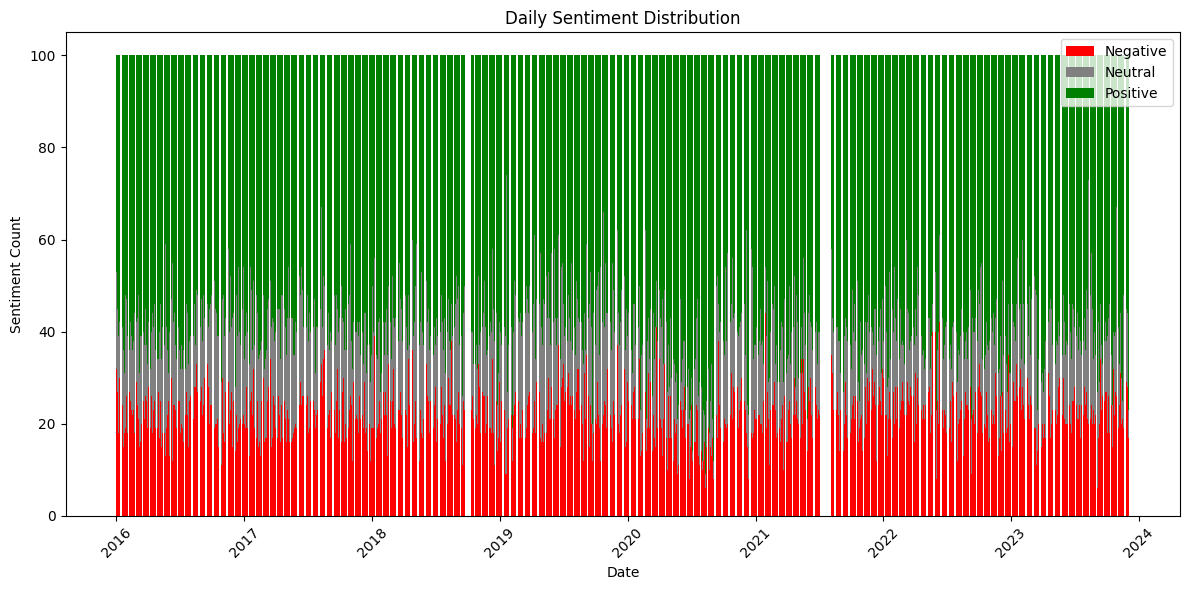

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('daily_sentiment_distribution.csv')

dates = pd.to_datetime(data['date'])
negative = data['negative']
neutral = data['neutral']
positive = data['positive']

plt.figure(figsize=(12, 6))
plt.bar(dates, negative, color='red', label='Negative', width=0.8)
plt.bar(dates, neutral, bottom=negative, color='grey', label='Neutral', width=0.8)
plt.bar(dates, positive, bottom=negative + neutral, color='green', label='Positive', width=0.8)

plt.xlabel('Date')
plt.ylabel('Sentiment Count')
plt.title('Daily Sentiment Distribution')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
